In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/dataset_train_mod.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row_id       8693 non-null   int64  
 1   HomePlanet   8630 non-null   object 
 2   Destination  8511 non-null   object 
 3   CryoSleep    8582 non-null   object 
 4   Age          8514 non-null   float64
 5   VIP          8626 non-null   object 
 6   TotalSpent   8175 non-null   float64
 7   HasGroup     8693 non-null   bool   
 8   Deck         8494 non-null   object 
 9   Side         8494 non-null   object 
 10  CabinNo      8494 non-null   float64
 11  Transported  8693 non-null   bool   
dtypes: bool(2), float64(3), int64(1), object(6)
memory usage: 696.2+ KB


In [3]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7447 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row_id       7447 non-null   int64  
 1   HomePlanet   7447 non-null   object 
 2   Destination  7447 non-null   object 
 3   CryoSleep    7447 non-null   object 
 4   Age          7447 non-null   float64
 5   VIP          7447 non-null   object 
 6   TotalSpent   7447 non-null   float64
 7   HasGroup     7447 non-null   bool   
 8   Deck         7447 non-null   object 
 9   Side         7447 non-null   object 
 10  CabinNo      7447 non-null   float64
 11  Transported  7447 non-null   bool   
dtypes: bool(2), float64(3), int64(1), object(6)
memory usage: 654.5+ KB


In [4]:
df['Transported'].value_counts()

True     3836
False    3611
Name: Transported, dtype: int64

In [5]:
df = df.astype({'VIP': bool, 'CryoSleep': bool})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7447 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row_id       7447 non-null   int64  
 1   HomePlanet   7447 non-null   object 
 2   Destination  7447 non-null   object 
 3   CryoSleep    7447 non-null   bool   
 4   Age          7447 non-null   float64
 5   VIP          7447 non-null   bool   
 6   TotalSpent   7447 non-null   float64
 7   HasGroup     7447 non-null   bool   
 8   Deck         7447 non-null   object 
 9   Side         7447 non-null   object 
 10  CabinNo      7447 non-null   float64
 11  Transported  7447 non-null   bool   
dtypes: bool(4), float64(3), int64(1), object(4)
memory usage: 552.7+ KB


In [6]:
def code_dest(x):
    dest_codes = {'TRAPPIST-1e': 'Trappist', '55 Cancri e': 'Cancri', 'PSO J318.5-22': 'PSO'}
    return dest_codes[x]
df['Destination'] = df['Destination'].apply(code_dest)
df

,row_id,HomePlanet,Destination,CryoSleep,Age,VIP,TotalSpent,HasGroup,Deck,Side,CabinNo,Transported
0,0,Europa,Trappist,False,39.0,False,0.0,False,B,P,0.0,False
1,1,Earth,Trappist,False,24.0,False,736.0,False,F,S,0.0,True
2,2,Europa,Trappist,False,58.0,True,10383.0,True,A,S,0.0,False
3,3,Europa,Trappist,False,33.0,False,5176.0,True,A,S,0.0,False
4,4,Earth,Trappist,False,16.0,False,1091.0,False,F,S,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,Europa,Cancri,False,41.0,True,8536.0,False,A,P,98.0,False
8689,8689,Earth,PSO,True,18.0,False,0.0,False,G,S,1499.0,False
8690,8690,Earth,Trappist,False,26.0,False,1873.0,False,G,S,1500.0,True
8691,8691,Europa,Cancri,False,32.0,False,4637.0,True,E,S,608.0,False


In [7]:
feature_columns = list(df.columns)[1:10]
X_total = df[feature_columns]
y_total = df['Transported']
print(X_total.info())
print(y_total.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7447 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   7447 non-null   object 
 1   Destination  7447 non-null   object 
 2   CryoSleep    7447 non-null   bool   
 3   Age          7447 non-null   float64
 4   VIP          7447 non-null   bool   
 5   TotalSpent   7447 non-null   float64
 6   HasGroup     7447 non-null   bool   
 7   Deck         7447 non-null   object 
 8   Side         7447 non-null   object 
dtypes: bool(3), float64(2), object(4)
memory usage: 429.1+ KB
None
<class 'pandas.core.series.Series'>
Int64Index: 7447 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
7447 non-null   bool 
dtypes: bool(1)
memory usage: 65.5 KB
None


In [8]:
X_total = pd.get_dummies(X_total, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], prefix=['Home', 'Dest', 'Deck', 'Side'])
X_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7447 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      7447 non-null   bool   
 1   Age            7447 non-null   float64
 2   VIP            7447 non-null   bool   
 3   TotalSpent     7447 non-null   float64
 4   HasGroup       7447 non-null   bool   
 5   Home_Earth     7447 non-null   uint8  
 6   Home_Europa    7447 non-null   uint8  
 7   Home_Mars      7447 non-null   uint8  
 8   Dest_Cancri    7447 non-null   uint8  
 9   Dest_PSO       7447 non-null   uint8  
 10  Dest_Trappist  7447 non-null   uint8  
 11  Deck_A         7447 non-null   uint8  
 12  Deck_B         7447 non-null   uint8  
 13  Deck_C         7447 non-null   uint8  
 14  Deck_D         7447 non-null   uint8  
 15  Deck_E         7447 non-null   uint8  
 16  Deck_F         7447 non-null   uint8  
 17  Deck_G         7447 non-null   uint8  
 18  Deck_T  

### Testing different classificator types

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, roc_curve, auc,
    classification_report, confusion_matrix
)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[0.        , 0.27848101, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.25316456, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.3164557 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.29113924, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.51898734, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.55696203, 0.        , ..., 0.        , 0.        ,
        1.        ]])

#### kNN model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
print('Train set accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Train set accuracy: 0.79
Test set accuracy: 0.72


In [17]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
print('After "Age" and "TotalSpent" normalized')
print('Train set accuracy: {:.2f}'.format(knn.score(X_train_scaled, y_train)))
print('Test set accuracy: {:.2f}'.format(knn.score(X_test_scaled, y_test)))

After "Age" and "TotalSpent" normalized
Train set accuracy: 0.80
Test set accuracy: 0.72


##### Cross-validation test

In [19]:
cv_scores = cross_val_score(knn, X_total, y_total, cv=10)
cv_scores

array([0.71006711, 0.69127517, 0.7033557 , 0.71543624, 0.70738255,
       0.71543624, 0.70067114, 0.72580645, 0.70833333, 0.70430108])

In [25]:
param_range = [x for x in range(1, 22, 2)]
param_range

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [26]:
train_scores, test_scores = validation_curve(knn, X_total, y_total, param_name='n_neighbors', param_range=param_range, cv=5)

In [27]:
print('Train_scores:\n', train_scores)
print('Test scores:\n', test_scores)

Train_scores:
 [[0.93570589 0.93973477 0.93554884 0.93370258 0.93588453]
 [0.82424039 0.82692631 0.82091306 0.81453508 0.81537429]
 [0.79016283 0.79435958 0.79909366 0.78566633 0.78986237]
 [0.78093    0.77824408 0.77811346 0.77240685 0.77492447]
 [0.77555817 0.77136142 0.76972138 0.75981873 0.76770728]
 [0.76598959 0.76750042 0.76317556 0.76082578 0.76351125]
 [0.75977841 0.76061776 0.76132931 0.75528701 0.75897952]
 [0.75642102 0.75574954 0.75545485 0.74941255 0.75629406]
 [0.75423871 0.75726037 0.75293723 0.74991608 0.75092313]
 [0.7537351  0.75524593 0.74739846 0.7475663  0.74840551]
 [0.75020984 0.75323149 0.74857335 0.74320242 0.7475663 ]]
Test scores:
 [[0.68255034 0.6704698  0.65278711 0.67427804 0.67159167]
 [0.68120805 0.69261745 0.68703828 0.69644056 0.69241101]
 [0.70469799 0.69798658 0.70315648 0.7179315  0.70852921]
 [0.70671141 0.71006711 0.70785762 0.72800537 0.71927468]
 [0.70939597 0.71409396 0.71323036 0.73136333 0.72867696]
 [0.71208054 0.71677852 0.71658831 0.74143

In [28]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

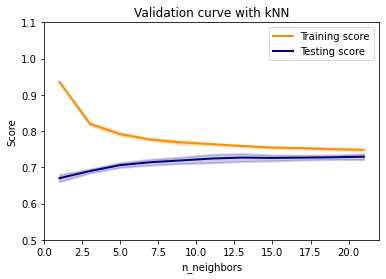

In [29]:
plt.figure()
plt.title('Validation curve with kNN')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.ylim(0.5, 1.1)
lw = 2
plt.plot(
    param_range,
    train_scores_mean,
    label='Training score',
    color='darkorange', lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2, color='darkorange', lw=lw
)
plt.plot(
    param_range,
    test_scores_mean,
    label='Testing score',
    color='navy', lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2, color='navy', lw=lw
)
plt.legend(loc='best')

#### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
print('Train set accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

c:\Applications\.venv\DataScience\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Train set accuracy: 0.60


c:\Applications\.venv\DataScience\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test set accuracy: 0.61


In [34]:
dt_clf_norm = DecisionTreeClassifier()
dt_clf_norm.fit(X_train_scaled, y_train)
print('After "Age" and "TotalSpent" normalized')
print('Train set accuracy: {:.2f}'.format(dt_clf_norm.score(X_train_scaled, y_train)))
print('Test set accuracy: {:.2f}'.format(dt_clf_norm.score(X_test_scaled, y_test)))

After "Age" and "TotalSpent" normalized
Train set accuracy: 0.95
Test set accuracy: 0.66


In [36]:
cv_scores = cross_val_score(dt_clf_norm, X_total, y_total, cv=10)
cv_scores

array([0.70201342, 0.65369128, 0.65771812, 0.68322148, 0.69395973,
       0.7033557 , 0.67651007, 0.69623656, 0.65994624, 0.67876344])

In [37]:
param_range = [x for x in range(1, 20)]
train_scores, test_scores = validation_curve(dt_clf_norm, X_total, y_total, param_name='max_depth', param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

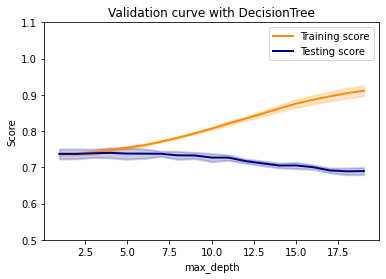

In [42]:
plt.figure()
plt.title('Validation curve with DecisionTree')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.ylim(0.5, 1.1)

plt.plot(
    param_range,
    train_scores_mean,
    label='Training score',
    color='darkorange', linewidth=2
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2, color='darkorange', linewidth=2
)
plt.plot(
    param_range,
    test_scores_mean,
    label='Testing score',
    color='navy', linewidth=2
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2, color='navy', linewidth=2
)
plt.legend(loc='best')

In [40]:
dt_clf_norm.feature_importances_

array([0.00714817, 0.23199216, 0.00640296, 0.52518441, 0.03655042,
       0.0454449 , 0.00927249, 0.00465763, 0.01026196, 0.00675597,
       0.01799741, 0.00272101, 0.00447757, 0.01227829, 0.00407716,
       0.03414605, 0.01018059, 0.01333693, 0.00075109, 0.01541696,
       0.00094587])

In [41]:
print('Feature importances:')
for feature, importance in zip(list(X_total.columns), dt_clf_norm.feature_importances_):
    print('- {}: {:.4f}'.format(feature, importance))

Feature importances:
- CryoSleep: 0.0071
- Age: 0.2320
- VIP: 0.0064
- TotalSpent: 0.5252
- HasGroup: 0.0366
- Home_Earth: 0.0454
- Home_Europa: 0.0093
- Home_Mars: 0.0047
- Dest_Cancri: 0.0103
- Dest_PSO: 0.0068
- Dest_Trappist: 0.0180
- Deck_A: 0.0027
- Deck_B: 0.0045
- Deck_C: 0.0123
- Deck_D: 0.0041
- Deck_E: 0.0341
- Deck_F: 0.0102
- Deck_G: 0.0133
- Deck_T: 0.0008
- Side_P: 0.0154
- Side_S: 0.0009


#### Random Forest Classifier

In [43]:
rf_clf = RandomForestClassifier(n_estimators=5)

In [44]:
rf_clf.fit(X_train, y_train)
print('Train set accuracy: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Train set accuracy: 0.92
Test set accuracy: 0.71


In [45]:
rf_clf_norm = RandomForestClassifier(n_estimators=5)
rf_clf_norm.fit(X_train_scaled, y_train)
print('After "Age" and "TotalSpent" normalized')
print('Train set accuracy: {:.2f}'.format(dt_clf_norm.score(X_train_scaled, y_train)))
print('Test set accuracy: {:.2f}'.format(dt_clf_norm.score(X_test_scaled, y_test)))

After "Age" and "TotalSpent" normalized
Train set accuracy: 0.95
Test set accuracy: 0.66


In [46]:
cv_scores = cross_val_score(dt_clf_norm, X_total, y_total, cv=10)
cv_scores

array([0.70469799, 0.64832215, 0.67651007, 0.68456376, 0.6885906 ,
       0.69530201, 0.68456376, 0.68951613, 0.66129032, 0.6827957 ])

In [49]:
param_range = [x for x in range(5, 201, 5)]
train_scores, test_scores = validation_curve(rf_clf, X_total, y_total, param_name='n_estimators', param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

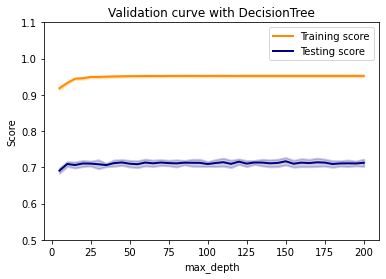

In [50]:
plt.figure()
plt.title('Validation curve with DecisionTree')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.ylim(0.5, 1.1)

plt.plot(
    param_range,
    train_scores_mean,
    label='Training score',
    color='darkorange', linewidth=2
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2, color='darkorange', linewidth=2
)
plt.plot(
    param_range,
    test_scores_mean,
    label='Testing score',
    color='navy', linewidth=2
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2, color='navy', linewidth=2
)
plt.legend(loc='best')

In [55]:
y_predicted = rf_clf_norm.predict(X_test_scaled)

In [56]:
print('Random forest with normalized features:')
print('- accuracy score: {:.2f}'.format(accuracy_score(y_test, y_predicted)))
print('- precision score: {:.2f}'.format(precision_score(y_test, y_predicted)))
print('- recall score: {:.2f}'.format(recall_score(y_test, y_predicted)))
print('- f1 score: {:.2f}'.format(f1_score(y_test, y_predicted)))
print('- confusion matrix:\n', confusion_matrix(y_test, y_predicted))
print('- classification report:\n', classification_report(y_test, y_predicted))

Random forest with normalized features:
- accuracy score: 0.70
- precision score: 0.73
- recall score: 0.66
- f1 score: 0.70
- confusion matrix:
 [[657 234]
 [326 645]]
- classification report:
               precision    recall  f1-score   support

       False       0.67      0.74      0.70       891
        True       0.73      0.66      0.70       971

    accuracy                           0.70      1862
   macro avg       0.70      0.70      0.70      1862
weighted avg       0.70      0.70      0.70      1862

